# **Atividade Proposta**

Implemente uma Rede Neural rasa para classificação de uma base multiclasse.

Esta rede deve:

Aceitar rótulos que podem ser números ou textos; Predizer os rótulos originais da base de dados;

Passar por parâmetro no construtor: Função de custo e cálculo do gradiente; Taxa de aprendizado; Número máximo de iterações; Threshold;

Funcionar para bases binárias. Teste pelo menos duas funções de custo diferentes em uma base multiclasse e uma base binária.

Plote gráficos com os hiperplanos separadores encontrados pelos algoritmos de treinamento. Se a base escolhida tiver mais do que 2 características, escolha as que você julgar que fornecem a melhor visualização.

# **Importações de Bibliotecas e Funções Básicas**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize

from sklearn.base import BaseEstimator, ClassifierMixin


def geradataset(tamanho=20, centros=2):
    X, y = make_blobs(n_samples=tamanho, centers=centros, center_box=(0, 1.0), cluster_std=0.05)
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)

# **Funções de Custo**

In [ ]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, CustoPerceptron.erro(y, ypred))

In [ ]:
class Adaline():
  def __init__(self):
    self.preactivated = True
  @staticmethod
  def erro(y,ypred):
    return y-ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum((1 - Adaline.erro(y,ypred))**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(X.T,Adaline.erro(y,ypred))

# **Implementação do Perceptron - Multiclasse**

In [ ]:
class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron(), alpha=0.001,maxiter=200,w = None):
        self.w = w
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = maxiter
        self.custo = custo
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.labels = list(set(y))
        if len(self.labels) > 2:
            y = label_binarize(y, classes=self.labels)*2-1
            self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
        else:
            self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            a = self.preactivate(X)
            ypred = self.activation(a)
            custo = self.custo.custo(y, ypred)
            if custo == 0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)


    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        if len(self.w.shape)  > 1:
            idx = np.argmax(a, axis=1)
            ypred = np.array([self.labels[i] for i in idx])
        else:
            ypred = self.activation(a)
        return ypred

# **Treinando com 4 Classes**

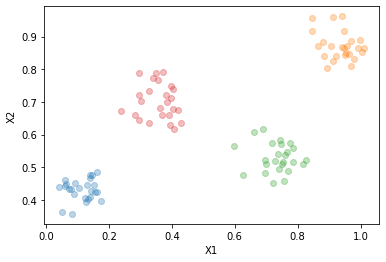

In [ ]:
X, y = geradataset(100, 4)
plotadataset(X, y)
plt.show()
ybin = label_binarize(y, classes=list(set(y)))*2-1
# ybin

In [ ]:
p_CustoPerceptron = Perceptron()
p_CustoPerceptron.fit(X, y)
p_Adaline = Perceptron(custo=Adaline())
p_Adaline.fit(X, y)

# **Testando com 4 Classes**



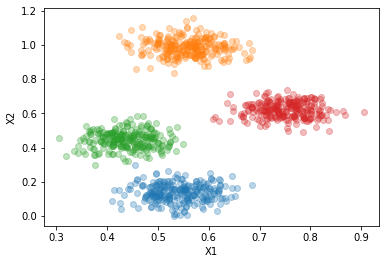

In [ ]:
X, y = geradataset(1000, 4)
plotadataset(X, y)
plt.show()
ybin = label_binarize(y, classes=list(set(y)))*2-1

0.185
[[-0.06722952  0.36526399  0.36099081 -0.31761135]
 [-0.14452143 -0.01298633 -0.52048361  0.52848906]] [ 0.08151845 -0.29530658  0.07897549 -0.21687384]


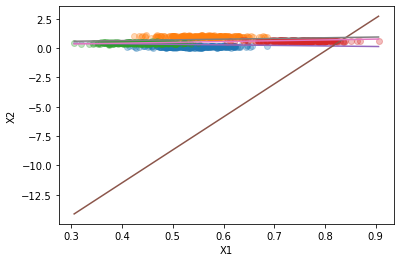

In [ ]:
ypred = p_CustoPerceptron.predict(X)
print(sum(y == ypred)/len(y))
print(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(p_CustoPerceptron.w[1:,i], p_CustoPerceptron.w[0,i], min(X[:,0]), max(X[:,0]))

0.488
[[-0.55179816  0.48093529  0.11652437 -0.350221  ]
 [ 0.16107104  0.79065988 -0.20345624  0.58023499]] [ 0.02418054 -0.83764481  0.04947178 -0.23920546]


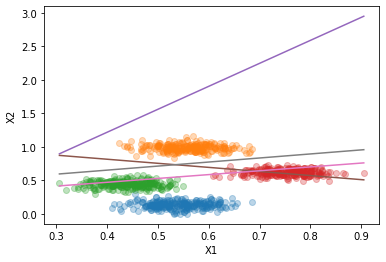

In [ ]:
ypred = p_Adaline.predict(X)
print(sum(y == ypred)/len(y))
print(p_Adaline.w[1:], p_Adaline.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(p_Adaline.w[1:,i], p_Adaline.w[0,i], min(X[:,0]), max(X[:,0]))

# **Treinando classe binária**

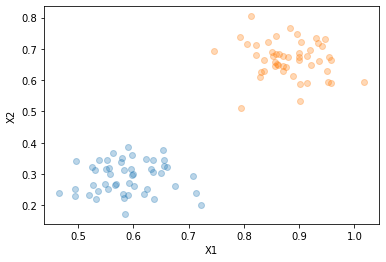

In [ ]:
X, y = geradataset(100, 2)
plotadataset(X, y)
plt.show()
ybin = label_binarize(y, classes=list(set(y)))*2-1

In [ ]:
p_CustoPerceptron = Perceptron()
p_CustoPerceptron.fit(X, y)
p_Adaline = Perceptron(custo=Adaline())
p_Adaline.fit(X, y)

# **Testando classe binária**

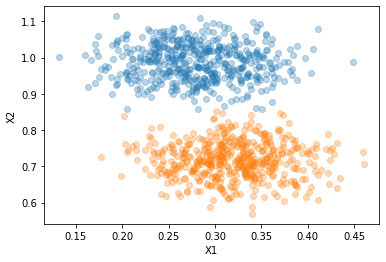

In [ ]:
X, y = geradataset(1000, 2)
plotadataset(X, y)
plt.show()
ybin = label_binarize(y, classes=list(set(y)))*2-1

0.0
[ 0.31221891 -0.04094474] -0.20671103657926088


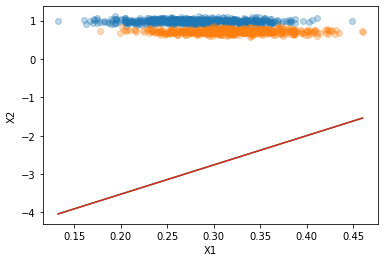

In [ ]:
ypred = p_CustoPerceptron.predict(X)
print(sum(y == ypred)/len(y))
print(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0], min(X[:,0]), max(X[:,0]))

0.0
[ 0.34511313 -0.06704885] -0.21482557732033863


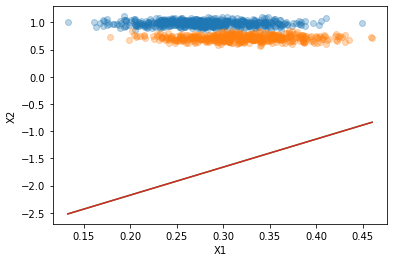

In [ ]:
ypred = p_Adaline.predict(X)
print(sum(y == ypred)/len(y))
print(p_Adaline.w[1:], p_Adaline.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(p_Adaline.w[1:], p_Adaline.w[0], min(X[:,0]), max(X[:,0]))

# **Treinando e Testando com Rótulo em Texto**

In [ ]:
X, y = geradataset(10, 3)

In [ ]:
y

array([1, 0, 2, 2, 1, 1, 0, 0, 0, 2])

In [ ]:
import string
import random
def random_generator(size=6, chars=string.ascii_uppercase + string.digits):
 return ''.join(random.choice(chars) for _ in range(size))

In [ ]:
def gera_rotulo_texto(vetor):
  resultado = []
  dicionario = {}

  for i in vetor:
    if i in dicionario.keys():
      valor = dicionario[i]
    else:
      valor  = random_generator()
      dicionario[i] = valor
    resultado.append(valor)
  return resultado


In [ ]:
ytext = gera_rotulo_texto(y)
y,ytext

(array([1, 0, 2, 2, 1, 1, 0, 0, 0, 2]),
 ['SWV6ST',
  '7FZI0R',
  'XQ1RN8',
  'XQ1RN8',
  'SWV6ST',
  'SWV6ST',
  '7FZI0R',
  '7FZI0R',
  '7FZI0R',
  'XQ1RN8'])

In [ ]:
p_CustoPerceptron = Perceptron()
p_CustoPerceptron.fit(X, ytext)
p_Adaline = Perceptron(custo=Adaline())
p_Adaline.fit(X, ytext)

In [ ]:
ypred = p_CustoPerceptron.predict(X)
ypred

array(['SWV6ST', '7FZI0R', 'XQ1RN8', 'XQ1RN8', 'SWV6ST', 'SWV6ST',
       '7FZI0R', '7FZI0R', '7FZI0R', 'XQ1RN8'], dtype='<U6')

In [ ]:
print(sum(ytext == ypred)/len(ytext))
print(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0])

1.0
[[-0.41625432 -0.08619018  0.19196892]
 [-0.49724368 -0.06873218  0.0566421 ]] [ 0.50413641  0.0849102  -0.23596872]


In [ ]:
ypred = p_Adaline.predict(X)
ypred

array(['7FZI0R', 'SWV6ST', 'XQ1RN8', 'XQ1RN8', '7FZI0R', '7FZI0R',
       'SWV6ST', '7FZI0R', 'SWV6ST', 'XQ1RN8'], dtype='<U6')

In [ ]:
print(sum(ytext == ypred)/len(ytext))
print(p_Adaline.w[1:], p_Adaline.w[0])

0.4
[[ 0.7328508  -0.95796335  0.0034224 ]
 [-0.11008442 -0.04531949 -0.07078353]] [-0.61398992  0.61771879  0.05119997]
